In [ ]:
import numpy as np
import torch as tc
import matplotlib.pyplot as plt

def gradient_descent(f, initial_guess, num_iters, learning_rate, echo=False):
    step = 0.001
    result = initial_guess.clone().detach().requires_grad_(True)
    for i in range(num_iters):
        gradient = tc.zeros_like(result)
        for j in range(len(result)):
            perturbed_result_plus = result.clone()
            perturbed_result_plus[j] += step
            perturbed_result_minus = result.clone()
            perturbed_result_minus[j] -= step
            gradient[j] = (f(*perturbed_result_plus) - f(*perturbed_result_minus)) / (2 * step)

        result = result - learning_rate * gradient

        if echo:
            print(f"Iteration {i+1}: Result = {result}, Function Value = {f(*result)}")

    return result

f = lambda x, y: x**2 + y**2
initial_guess = tc.randn(2).type(tc.float32)
num_iters = 50
learning_rate = 0.1
echo = True

result = gradient_descent(f, initial_guess, num_iters, learning_rate, echo)
print(f"Initial arguments: {initial_guess}, Value of the function for the initial arguments: {f(*initial_guess)}")
print(f"Result: {result}, Value of the function at the result: {f(*result)}")


Iteration 1: Result = tensor([-0.8574, -0.5276], grad_fn=<SubBackward0>), Function Value = 1.0134357213974
Iteration 2: Result = tensor([-0.6859, -0.4221], grad_fn=<SubBackward0>), Function Value = 0.6486117243766785
Iteration 3: Result = tensor([-0.5487, -0.3377], grad_fn=<SubBackward0>), Function Value = 0.4151167869567871
Iteration 4: Result = tensor([-0.4390, -0.2701], grad_fn=<SubBackward0>), Function Value = 0.26567625999450684
Iteration 5: Result = tensor([-0.3512, -0.2161], grad_fn=<SubBackward0>), Function Value = 0.17003512382507324
Iteration 6: Result = tensor([-0.2809, -0.1729], grad_fn=<SubBackward0>), Function Value = 0.1088232770562172
Iteration 7: Result = tensor([-0.2248, -0.1383], grad_fn=<SubBackward0>), Function Value = 0.06964720785617828
Iteration 8: Result = tensor([-0.1798, -0.1107], grad_fn=<SubBackward0>), Function Value = 0.04457424581050873
Iteration 9: Result = tensor([-0.1438, -0.0885], grad_fn=<SubBackward0>), Function Value = 0.028527600690722466
Iterati

In [ ]:
initial_guess = tc.randn(2).type(tc.float32)
num_iters = 50
learning_rate_low = 0.01
learning_rate_medium = 0.1
learning_rate_high =  10
echo = True

print()
result_lr_low = gradient_descent(f, initial_guess, num_iters, learning_rate_low, echo)
print()
print(f"Result: {result}, Value of the function at the result: {f(*result_lr_low)}")

print()
result_lr_medium = gradient_descent(f, initial_guess, num_iters, learning_rate_medium, echo)
print()
print(f"Result: {result}, Value of the function at the result: {f(*result_lr_medium)}")

print()
result_lr_high = gradient_descent(f, initial_guess, num_iters, learning_rate_high, echo)
print()
print(f"Result: {result}, Value of the function at the result: {f(*result_lr_high)}")


Iteration 1: Result = tensor([-0.3251, -1.2104], grad_fn=<SubBackward0>), Function Value = 1.5707355737686157
Iteration 2: Result = tensor([-0.3186, -1.1862], grad_fn=<SubBackward0>), Function Value = 1.5085314512252808
Iteration 3: Result = tensor([-0.3123, -1.1624], grad_fn=<SubBackward0>), Function Value = 1.4487910270690918
Iteration 4: Result = tensor([-0.3060, -1.1392], grad_fn=<SubBackward0>), Function Value = 1.3914167881011963
Iteration 5: Result = tensor([-0.2999, -1.1164], grad_fn=<SubBackward0>), Function Value = 1.336315631866455
Iteration 6: Result = tensor([-0.2939, -1.0941], grad_fn=<SubBackward0>), Function Value = 1.2833956480026245
Iteration 7: Result = tensor([-0.2880, -1.0722], grad_fn=<SubBackward0>), Function Value = 1.2325713634490967
Iteration 8: Result = tensor([-0.2823, -1.0508], grad_fn=<SubBackward0>), Function Value = 1.183759331703186
Iteration 9: Result = tensor([-0.2766, -1.0297], grad_fn=<SubBackward0>), Function Value = 1.136879324913025
Iteration 10

In [ ]:
import torch as tc
import time

def gradient_descent_autograd(f, initial_guess, num_iters, learning_rate, echo=False):
    """
    f - function (callable) : of N variables
    num_iters - int : number of iterations
    initial_guess - Tensor : vector of N variables
    learning_rate - float: the learning rate for gradient descent update
    echo - bool: whether to print the results during each iteration
    Note: Implement the gradient calculation using PyTorch Autograd
    """
    result = initial_guess.clone().detach().requires_grad_(True)

    for i in range(num_iters):
        if result.grad is not None:
            result.grad.zero_()
        value = f(*result)
        value.backward()
        with tc.no_grad():
            result -= learning_rate * result.grad
        if echo:
            print(f"Iteration {i + 1}: result = {result.data}, f(result) = {value.item()}")

    return result.detach()

def f(x, y):
    return x**2 + y**2

initial_guess = tc.randn(2).type(tc.float32)
num_iters = 50
learning_rate = 0.1
echo = True

result = gradient_descent(f, initial_guess, num_iters, learning_rate, echo)
result_autograd = gradient_descent_autograd(f, initial_guess, num_iters, learning_rate, echo)

print(f"Initial arguments: {initial_guess}, Value of the function for the initial arguments: {f(*initial_guess)}")
print(f"Result: {result}, Value of the function at the result: {f(*result)}")
print(f"Result Autograd: {result_autograd}, Value of the function at the result: {f(*result_autograd)}")

start_time = time.time()
result_autograd = gradient_descent_autograd(f, initial_guess, num_iters, learning_rate, echo)
end_time = time.time()

print(f"Execution time: {end_time - start_time} seconds")


Iteration 1: Result = tensor([ 0.0730, -1.7194], grad_fn=<SubBackward0>), Function Value = 2.9616520404815674
Iteration 2: Result = tensor([ 0.0584, -1.3755], grad_fn=<SubBackward0>), Function Value = 1.89541494846344
Iteration 3: Result = tensor([ 0.0467, -1.1004], grad_fn=<SubBackward0>), Function Value = 1.21304190158844
Iteration 4: Result = tensor([ 0.0374, -0.8803], grad_fn=<SubBackward0>), Function Value = 0.7763363718986511
Iteration 5: Result = tensor([ 0.0299, -0.7042], grad_fn=<SubBackward0>), Function Value = 0.49685683846473694
Iteration 6: Result = tensor([ 0.0239, -0.5634], grad_fn=<SubBackward0>), Function Value = 0.3179890215396881
Iteration 7: Result = tensor([ 0.0191, -0.4507], grad_fn=<SubBackward0>), Function Value = 0.20351427793502808
Iteration 8: Result = tensor([ 0.0153, -0.3606], grad_fn=<SubBackward0>), Function Value = 0.13024979829788208
Iteration 9: Result = tensor([ 0.0122, -0.2885], grad_fn=<SubBackward0>), Function Value = 0.08336012065410614
Iteration 

In [ ]:
import torch as tc
import torch.nn as nn

class ClassificationNetwork(nn.Module):
    def __init__(self):
        super(ClassificationNetwork, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.batchnorm1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=2)
        self.batchnorm2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.batchnorm3 = nn.BatchNorm2d(64)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=2)
        self.batchnorm4 = nn.BatchNorm2d(64)
        self.relu4 = nn.ReLU()
        self.conv5 = nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=2)
        self.batchnorm5 = nn.BatchNorm2d(64)
        self.relu5 = nn.ReLU()
        self.conv6 = nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1)
        self.batchnorm6 = nn.BatchNorm2d(64)
        self.relu6 = nn.ReLU()
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc1 = nn.Linear(64, 64)
        self.relu7 = nn.ReLU()
        self.fc2 = nn.Linear(64, 64)
        self.relu8 = nn.ReLU()
        self.fc3 = nn.Linear(64, 4)

    def forward(self, x):
        x = self.conv1(x)
        x = self.batchnorm1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.batchnorm2(x)
        x = self.relu2(x)
        x = self.conv3(x)
        x = self.batchnorm3(x)
        x = self.relu3(x)
        x = self.conv4(x)
        x = self.batchnorm4(x)
        x = self.relu4(x)
        x = self.conv5(x)
        x = self.batchnorm5(x)
        x = self.relu5(x)
        x = self.conv6(x)
        x = self.batchnorm6(x)
        x = self.relu6(x)
        x = self.avgpool(x)
        x = tc.flatten(x, 1)
        x = self.fc1(x)
        x = self.relu7(x)
        x = self.fc2(x)
        x = self.relu8(x)
        x = self.fc3(x)
        return x



In [ ]:
from torchsummary import summary
device = "cuda:0"

classification_network = ClassificationNetwork()

batch_size = 4
random_input = tc.randn((batch_size, 1, 224, 224))
random_output = classification_network(random_input)

print(f"Size of the random input: {random_input.size()}")
print(f"Size of the random output: {random_output.size()}")
print("Random output: ")
print(random_output)

print("Network summary: ")
summary(classification_network.to(device), (1, 224, 224))

Size of the random input: torch.Size([4, 1, 224, 224])
Size of the random output: torch.Size([4, 4])
Random output: 
tensor([[-0.0280,  0.1764, -0.0186, -0.0498],
        [-0.0248,  0.1779, -0.0155, -0.0458],
        [-0.0272,  0.1856, -0.0092, -0.0488],
        [-0.0305,  0.1791, -0.0143, -0.0541]], grad_fn=<AddmmBackward0>)
Network summary: 
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             320
       BatchNorm2d-2         [-1, 32, 224, 224]              64
              ReLU-3         [-1, 32, 224, 224]               0
            Conv2d-4         [-1, 64, 113, 113]          18,496
       BatchNorm2d-5         [-1, 64, 113, 113]             128
              ReLU-6         [-1, 64, 113, 113]               0
            Conv2d-7         [-1, 64, 113, 113]          36,928
       BatchNorm2d-8         [-1, 64, 113, 113]             128
             

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
input_file =  '/content/drive/MyDrive/ColabNotebooks_/Lab-4/Brain_MRI.zip'
output_folder = '/content/drive/MyDrive/ColabNotebooks_/Lab-4/'

print(f"Input file path: {input_file}")
print(f"Output folder path: {output_folder}")
!unzip {input_file} -d {output_folder} # Do this only once, them comment out this command




Input file path: /content/drive/MyDrive/ColabNotebooks_/Lab-4/Brain_MRI.zip
Output folder path: /content/drive/MyDrive/ColabNotebooks_/Lab-4/
Archive:  /content/drive/MyDrive/ColabNotebooks_/Lab-4/Brain_MRI.zip
  inflating: /content/drive/MyDrive/ColabNotebooks_/Lab-4/Testing/glioma_tumor/image(1).jpg  
  inflating: /content/drive/MyDrive/ColabNotebooks_/Lab-4/Testing/glioma_tumor/image(10).jpg  
  inflating: /content/drive/MyDrive/ColabNotebooks_/Lab-4/Testing/glioma_tumor/image(100).jpg  
  inflating: /content/drive/MyDrive/ColabNotebooks_/Lab-4/Testing/glioma_tumor/image(11).jpg  
  inflating: /content/drive/MyDrive/ColabNotebooks_/Lab-4/Testing/glioma_tumor/image(12).jpg  
  inflating: /content/drive/MyDrive/ColabNotebooks_/Lab-4/Testing/glioma_tumor/image(13).jpg  
  inflating: /content/drive/MyDrive/ColabNotebooks_/Lab-4/Testing/glioma_tumor/image(14).jpg  
  inflating: /content/drive/MyDrive/ColabNotebooks_/Lab-4/Testing/glioma_tumor/image(15).jpg  
  inflating: /content/drive/M

In [ ]:
import os
import pandas as pd

dataset_path = '/content/drive/MyDrive/ColabNotebooks_/Lab-4/'
training_csv_path = os.path.join(dataset_path, "training.csv")
testing_csv_path = os.path.join(dataset_path, "testing.csv")

training_data_path = os.path.join(dataset_path, "Training")
testing_data_path = os.path.join(dataset_path, "Testing")

classes = os.listdir(training_data_path)
print(f"Available classes: {classes}")

classes_dict = {classes[i]: i for i in range(len(classes))}
print(f"Classes dict: {classes_dict}")

training_cases = []
testing_cases = []

for current_class in classes:
    class_number = classes_dict[current_class]
    class_path = os.path.join(training_data_path, current_class)
    for case in os.listdir(class_path):
        case_path = os.path.join(class_path, case)
        training_cases.append((case_path, class_number, current_class))

for current_class in classes:
    class_number = classes_dict[current_class]
    class_path = os.path.join(testing_data_path, current_class)
    for case in os.listdir(class_path):
        case_path = os.path.join(class_path, case)
        testing_cases.append((case_path, class_number, current_class))

training_df = pd.DataFrame(training_cases, columns=['image_path', 'image_class_number', 'image_class_name'])
testing_df = pd.DataFrame(testing_cases, columns=['image_path', 'image_class_number', 'image_class_name'])

training_df.to_csv(training_csv_path, index=False)
testing_df.to_csv(testing_csv_path, index=False)



Available classes: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
Classes dict: {'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}


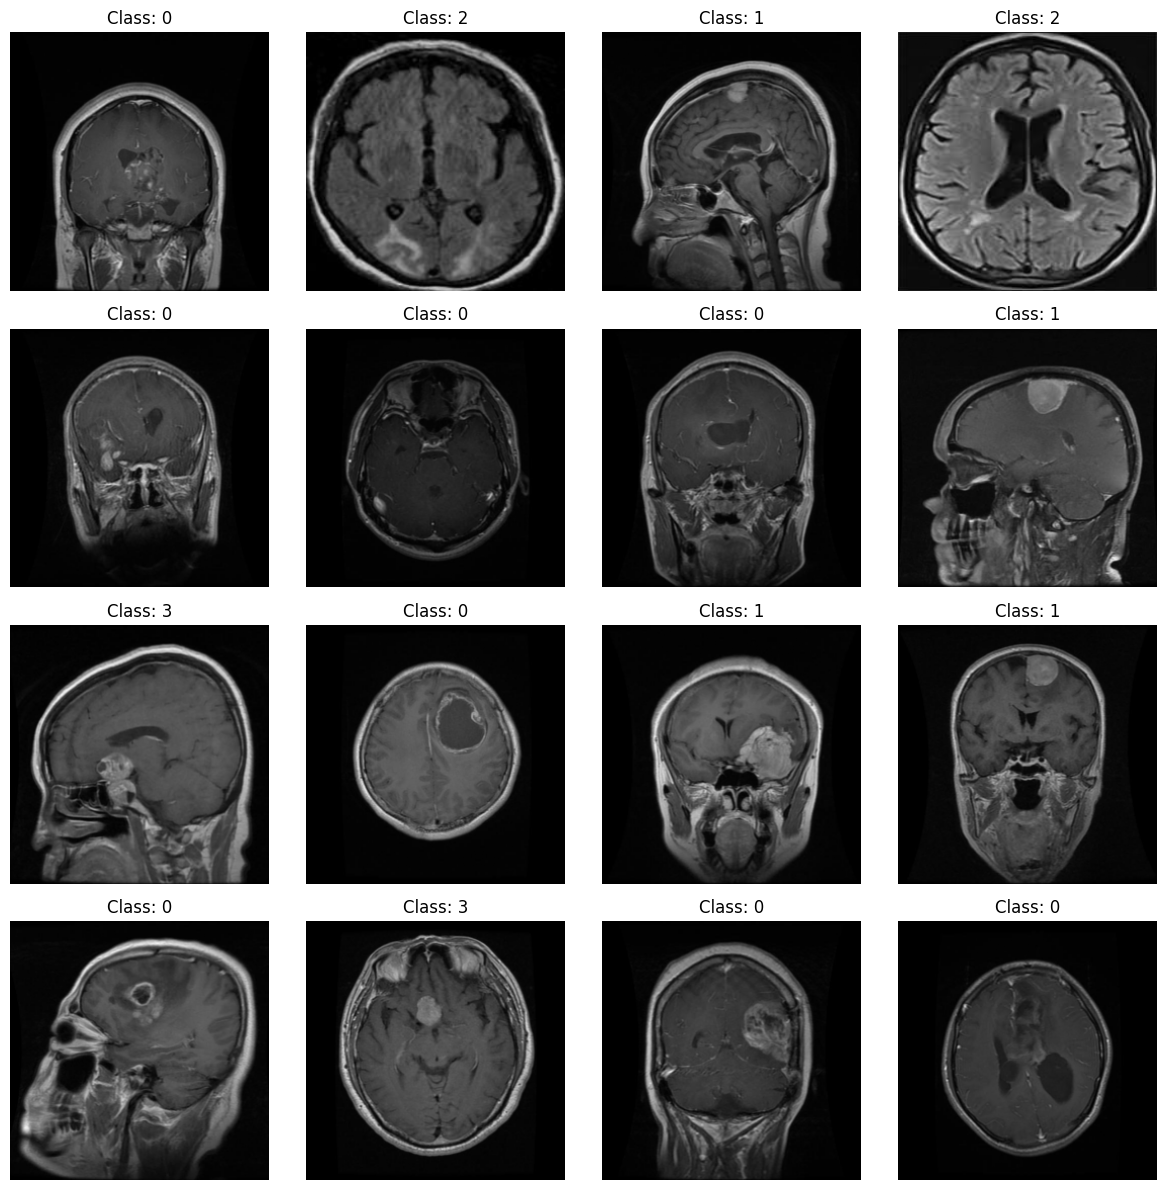

In [ ]:
import os
import pandas as pd
import torch as tc
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as T
from PIL import Image
import matplotlib.pyplot as plt

class BrainDataset(Dataset):
    def __init__(self, dataset_path, csv_path, transforms=None, z_norm=False):
        self.dataset_path = dataset_path
        self.csv_path = csv_path
        self.transforms = transforms
        self.z_norm = z_norm
        self.dataframe = pd.read_csv(csv_path)

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.dataset_path, self.dataframe.iloc[idx, 0])
        image = Image.open(img_name).convert("RGB")
        label = self.dataframe.iloc[idx, 1]

        if self.transforms:
            image = self.transforms(image)

        if self.z_norm:
            image = (image - image.mean()) / image.std()

        return image, label

batch_size = 16
shuffle = True

transform = T.Compose([
    T.Resize((256, 256)),
    T.ToTensor()
])

training_dataset = BrainDataset(os.path.join(dataset_path, "Training"), training_csv_path, transforms=transform)
training_dataloader = DataLoader(training_dataset, batch_size=batch_size, shuffle=shuffle)

for images, classes in training_dataloader:
    fig, axs = plt.subplots(4, 4, figsize=(12, 12))
    for i in range(batch_size):
        row = i // 4
        col = i % 4
        img = images[i].permute(1, 2, 0).numpy()
        axs[row, col].imshow(img)
        axs[row, col].set_title(f'Class: {classes[i]}')
        axs[row, col].axis('off')
    plt.tight_layout()
    plt.show()
    break


In [ ]:
import torch as tc

def training(model, training_dataloader, testing_dataloader, training_params):
    num_epochs = training_params['num_epochs']
    learning_rate = training_params['learning_rate']

    objective_function = tc.nn.CrossEntropyLoss()
    parameters = model.parameters()
    optimizer = tc.optim.Adam(parameters, lr=learning_rate)
    device = "cuda:0" if tc.cuda.is_available() else "cpu"
    model = model.to(device)

    print(f"Training dataset size: {len(training_dataloader.dataset)}")
    print(f"Testing dataset size: {len(testing_dataloader.dataset)}")

    training_losses = []
    testing_losses = []

    for epoch in range(num_epochs):
        print(f"Current epoch: {epoch}")
        training_epoch_loss = 0.0
        model.train()

        for images, classes in training_dataloader:
            images, classes = images.to(device), classes.to(device)
            optimizer.zero_grad()
            output = model(images)
            loss = objective_function(output, classes)
            loss.backward()
            optimizer.step()
            training_epoch_loss += loss.item() * images.size(0)

        training_epoch_loss /= len(training_dataloader.dataset)
        training_losses.append(training_epoch_loss)
        print(f"Current epoch training loss: {training_epoch_loss}")

        testing_epoch_loss = 0.0
        model.eval()

        for images, classes in testing_dataloader:
            images, classes = images.to(device), classes.to(device)
            output = model(images)
            loss = objective_function(output, classes)
            testing_epoch_loss += loss.item() * images.size(0)

        testing_epoch_loss /= len(testing_dataloader.dataset)
        testing_losses.append(testing_epoch_loss)
        print(f"Current epoch testing loss: {testing_epoch_loss}")

    return model, training_losses, testing_losses


In [ ]:
learning_rate = 0.003
batch_size = 32
num_epochs = 100
shuffle = True
model = ClassificationNetwork()

training_params = {
    'learning_rate': learning_rate,
    'num_epochs': num_epochs,
}

training_dataset = BrainDataset(os.path.join(dataset_path, "Training"), training_csv_path, transforms=transform)
training_dataloader = DataLoader(training_dataset, batch_size=batch_size, shuffle=shuffle)

testing_dataset = BrainDataset(os.path.join(dataset_path, "Testing"), testing_csv_path, transforms=transform)
testing_dataloader = DataLoader(testing_dataset, batch_size=batch_size, shuffle=False)

model, training_losses, testing_losses = training(model, training_dataloader, testing_dataloader, training_params)

Training dataset size: 1306
Testing dataset size: 394
Current epoch: 0
Current epoch training loss: 0.6487704025293383
Current epoch testing loss: 5.273368725316779
Current epoch: 1
Current epoch training loss: 0.4948546701605798
Current epoch testing loss: 9.650536655710756
Current epoch: 2
Current epoch training loss: 0.4895869082276343
Current epoch testing loss: 6.188206420937165
Current epoch: 3
Current epoch training loss: 0.441068835362541
Current epoch testing loss: 9.022867881177646
Current epoch: 4
Current epoch training loss: 0.43303183734325684
Current epoch testing loss: 4.119009261203901
Current epoch: 5
Current epoch training loss: 0.41022889058221174
Current epoch testing loss: 6.538889846825962
Current epoch: 6
Current epoch training loss: 0.3675679133414857
Current epoch testing loss: 10.447834342018451
Current epoch: 7
Current epoch training loss: 0.37344867214674604
Current epoch testing loss: 18.473067346625687
Current epoch: 8
Current epoch training loss: 0.332559

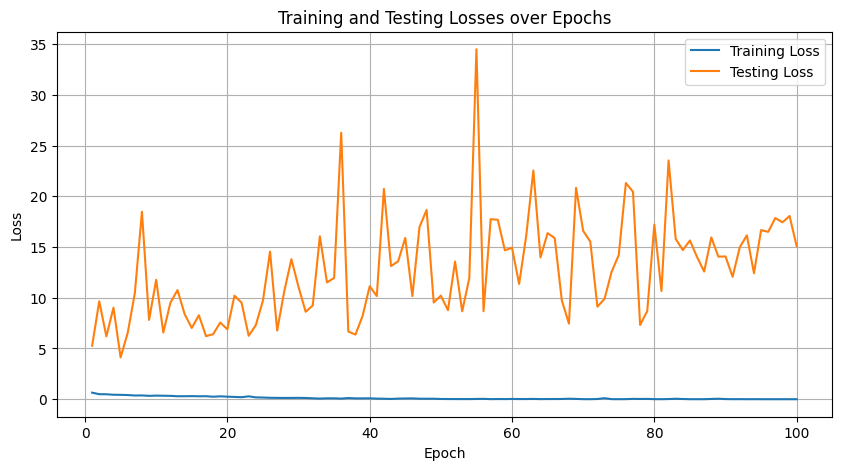

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), training_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), testing_losses, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Losses over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import torch as tc

def accumulate_predictions(model, dataloader):
    predictions = []
    targets = []
    device = "cuda:0" if tc.cuda.is_available() else "cpu"
    model.to(device)
    model.eval()
    with tc.no_grad():
        print(f"Dataset size: {len(dataloader.dataset)}")
        for images, classes in dataloader:
            images, classes = images.to(device), classes.to(device)
            outputs = model(images)
            _, predicted = tc.max(outputs, 1)
            predictions.extend(predicted.cpu().numpy())
            targets.extend(classes.cpu().numpy())
    return predictions, targets

training_predictions, training_targets = accumulate_predictions(model, training_dataloader)
testing_predictions, testing_targets = accumulate_predictions(model, testing_dataloader)


Dataset size: 1306
Dataset size: 394


Confusion matrix training:
[[  0   0   0]
 [  0   0   0]
 [  0   0 480]]


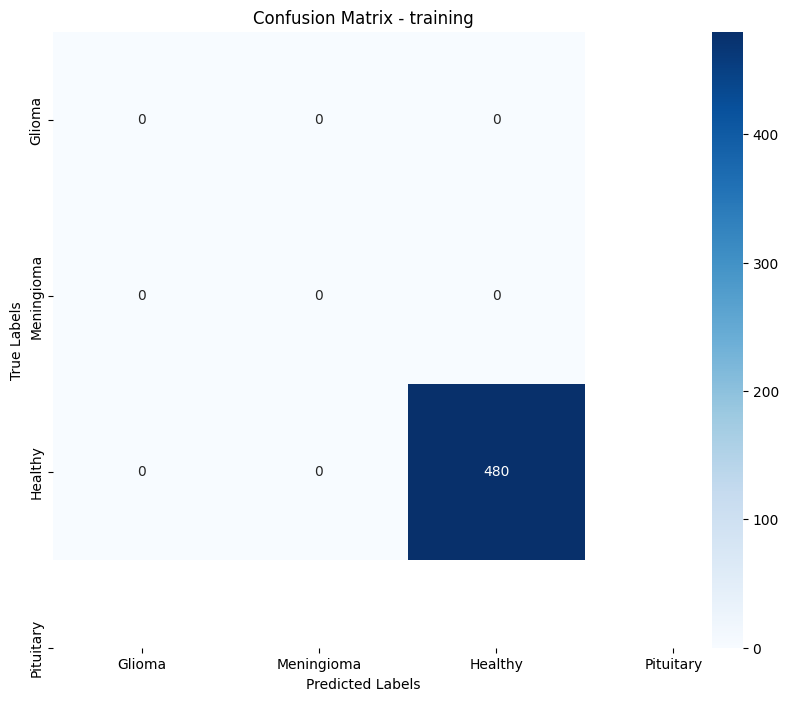

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2326: UserWarning: labels size, 3, does not match size of target_names, 4
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisio

              precision    recall  f1-score   support

      Glioma       0.00      0.00      0.00         0
  Meningioma       0.00      0.00      0.00         0
     Healthy       1.00      1.00      1.00       480

   micro avg       1.00      1.00      1.00       480
   macro avg       0.33      0.33      0.33       480
weighted avg       1.00      1.00      1.00       480

Confusion matrix testing:
[[  0   0  69]
 [  0   0  90]
 [  0   0 114]]


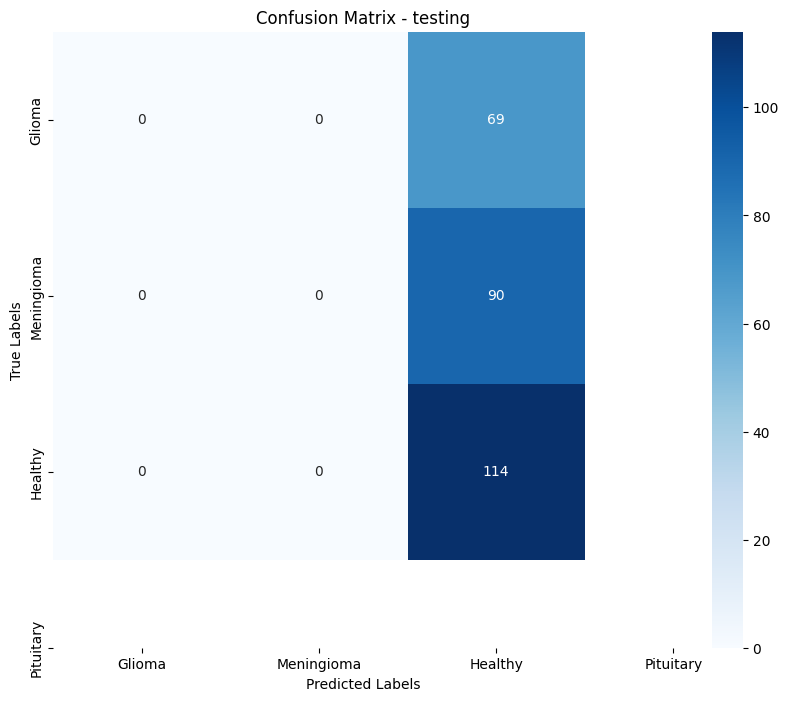

              precision    recall  f1-score   support

      Glioma       0.00      0.00      0.00        74
  Meningioma       0.00      0.00      0.00       105
     Healthy       0.34      0.99      0.50       115

   micro avg       0.34      0.39      0.36       294
   macro avg       0.11      0.33      0.17       294
weighted avg       0.13      0.39      0.20       294



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2326: UserWarning: labels size, 3, does not match size of target_names, 4
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

In [ ]:
import sklearn.metrics as metrics
import numpy as np
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

target_names = ["Glioma", "Meningioma", "Healthy", "Pituitary"]
class_labels = [1, 2, 3]

def print_classification_report_and_confusion_matrix(targets, predictions, dataset_name):
    cm = metrics.confusion_matrix(targets, predictions, labels=class_labels)
    print(f"Confusion matrix {dataset_name}:\n{cm}")

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {dataset_name}')
    plt.show()

    report = metrics.classification_report(targets, predictions, target_names=target_names, labels=class_labels)
    print(report)

print_classification_report_and_confusion_matrix(training_targets, training_predictions, "training")

print_classification_report_and_confusion_matrix(testing_targets, testing_predictions, "testing")


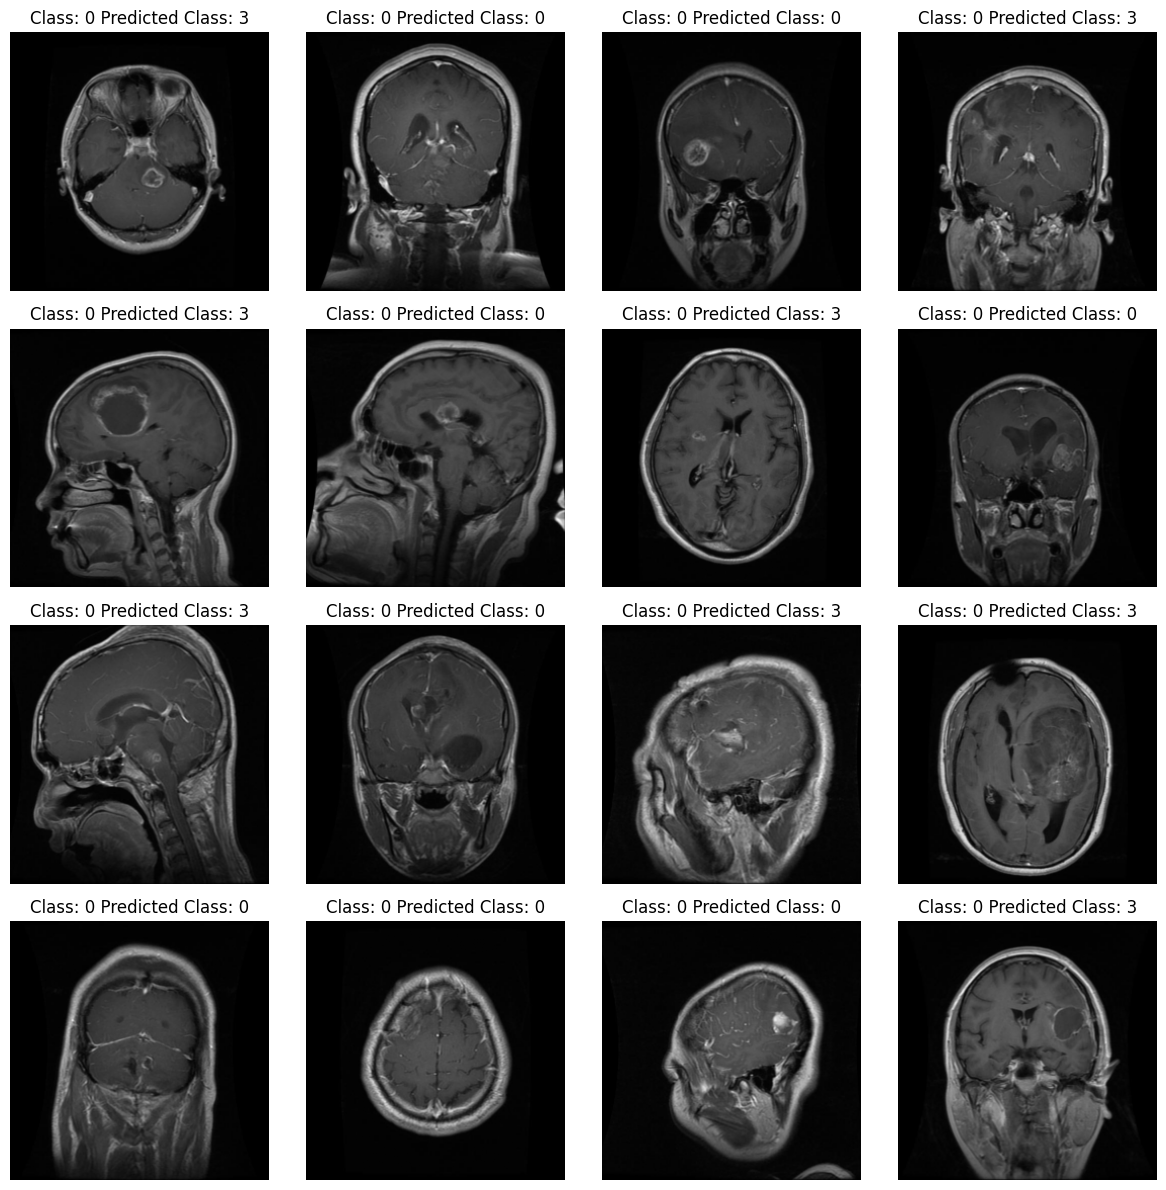

In [ ]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as T
from PIL import Image
import matplotlib.pyplot as plt


training_predictions, training_targets = accumulate_predictions(model, training_dataloader)

fig, axs = plt.subplots(4, 4, figsize=(12, 12))
for idx, (image, real_class) in enumerate(training_dataset):
    if idx == batch_size:
        break
    row = idx // 4
    col = idx % 4
    predicted_class = training_predictions[idx]
    axs[row, col].imshow(image.permute(1, 2, 0).numpy())
    axs[row, col].set_title(f'Class: {real_class} Predicted Class: {predicted_class}')
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()
